### Review basic standard deviatioin concept

In [1]:
#https://medium.com/mlearning-ai/understanding-torchvision-functionalities-for-pytorch-part-2-transforms-886b60d5c23a
import torch
from torchvision import transforms
from PIL import Image
import os
# Normalization=(standardization): (x-mean)/standard_dev
torch.Tensor([2,3,5,6,7,4,8,7,6])

tensor([2., 3., 5., 6., 7., 4., 8., 7., 6.])

In [2]:
m=torch.mean(torch.Tensor([2,3,5,6,7,4,8,7,6]))
print(m)

tensor(5.3333)


In [3]:
s=torch.std(torch.Tensor([2,3,5,6,7,4,8,7,6]))
print(s)

tensor(2.)


In [4]:
data=[(x-m)/s for x in torch.Tensor([2,3,5,6,7,4,8,7,6])]
print(data)

[tensor(-1.6667), tensor(-1.1667), tensor(-0.1667), tensor(0.3333), tensor(0.8333), tensor(-0.6667), tensor(1.3333), tensor(0.8333), tensor(0.3333)]


In [5]:
# conver to a list
data=[x.item() for x in data]
print(data)

[-1.6666667461395264, -1.1666667461395264, -0.16666674613952637, 0.33333325386047363, 0.8333332538604736, -0.6666667461395264, 1.3333332538604736, 0.8333332538604736, 0.33333325386047363]


### Draw histogram

In [6]:
t=transforms.ToTensor()
ts=t(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))

In [7]:
ts.shape

torch.Size([3, 188, 239])

In [8]:
ts[0].shape # first channel

torch.Size([188, 239])

In [9]:
ts[0]  # first channel data

tensor([[0.5843, 0.5843, 0.5843,  ..., 0.7725, 0.7569, 0.7490],
        [0.5804, 0.5843, 0.5843,  ..., 0.7765, 0.7647, 0.7569],
        [0.5804, 0.5804, 0.5843,  ..., 0.7843, 0.7765, 0.7647],
        ...,
        [0.7059, 0.7059, 0.7098,  ..., 0.8235, 0.8314, 0.8353],
        [0.6784, 0.6784, 0.6824,  ..., 0.8235, 0.8314, 0.8392],
        [0.6745, 0.6745, 0.6784,  ..., 0.8196, 0.8235, 0.8314]])

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [11]:
img = Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg"))

In [12]:
# convert PIL image to numpy array
img_np = np.array(img)

In [13]:
img_np.shape # note that torch.Size([3, 188, 239]) and image.size is (239, 188)

(188, 239, 3)

In [14]:
img_np.ravel() # conver to one dimention

array([149, 128, 101, ..., 212, 209, 220], dtype=uint8)

In [15]:
len(img_np.ravel())

134796

In [16]:
188*239*3

134796

Text(0.5, 1.0, 'distribution of pixels')

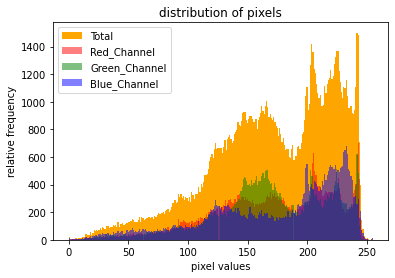

In [17]:
# plot the pixel values
plt.hist(img_np.ravel(), bins=256, color = 'orange', )
plt.hist(img_np[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(img_np[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5)
plt.hist(img_np[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.title("distribution of pixels")

### ToTensor and Normalize
The compose creates a two transformations to prepare the dataset. Torchvision reads datasets into PILImage (Python imaging format). ToTensor converts the PIL Image from range [0, 255] to a FloatTensor of shape (C x H x W) with range [0.0, 1.0] by divided by 255. It then renormalizes the input to [-1, 1] based on the following formula with μ=standard deviation=0.5.

- input=(input-mean)/standard deviation 
- input=(input-0.5)/0.5  for for a mean = 0.5, std = 0.5. 

The result is normalized to [(0.0-0.5)/0.5 and (1-0.5) /0.5 ], i.e., range1 [-1,1].

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/

In [32]:
transformation = transforms.Compose([                             
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
ts=transformation(Image.open(os.path.join(os.getcwd(), "data/validation/pos/Snipaste_2022-01-12_19-04-13.jpg") ))


In [33]:
ts.shape

torch.Size([3, 188, 239])

In [34]:
ts

tensor([[[ 0.1686,  0.1686,  0.1686,  ...,  0.5451,  0.5137,  0.4980],
         [ 0.1608,  0.1686,  0.1686,  ...,  0.5529,  0.5294,  0.5137],
         [ 0.1608,  0.1608,  0.1686,  ...,  0.5686,  0.5529,  0.5294],
         ...,
         [ 0.4118,  0.4118,  0.4196,  ...,  0.6471,  0.6627,  0.6706],
         [ 0.3569,  0.3569,  0.3647,  ...,  0.6471,  0.6627,  0.6784],
         [ 0.3490,  0.3490,  0.3569,  ...,  0.6392,  0.6471,  0.6627]],

        [[ 0.0039,  0.0039,  0.0039,  ...,  0.5373,  0.5059,  0.4902],
         [-0.0039,  0.0039,  0.0039,  ...,  0.5451,  0.5216,  0.5059],
         [-0.0039, -0.0039,  0.0039,  ...,  0.5608,  0.5451,  0.5216],
         ...,
         [ 0.3961,  0.3961,  0.3961,  ...,  0.6314,  0.6471,  0.6471],
         [ 0.3412,  0.3412,  0.3490,  ...,  0.6314,  0.6471,  0.6549],
         [ 0.3176,  0.3176,  0.3255,  ...,  0.6235,  0.6314,  0.6392]],

        [[-0.2078, -0.2078, -0.2078,  ...,  0.5059,  0.4745,  0.4588],
         [-0.2157, -0.2078, -0.2078,  ...,  0

In [36]:
after_norm=ts.reshape(-1)

In [37]:
after_norm

tensor([0.1686, 0.1686, 0.1686,  ..., 0.7255, 0.7333, 0.7255])

In [38]:
after_norm.shape

torch.Size([134796])

In [39]:
after_norm=after_norm.numpy()

In [40]:
after_norm

array([0.1686275 , 0.1686275 , 0.1686275 , ..., 0.7254902 , 0.73333335,
       0.7254902 ], dtype=float32)

### Draw historam after ToTensor and Normalization

Text(0.5, 1.0, 'distribution of pixels')

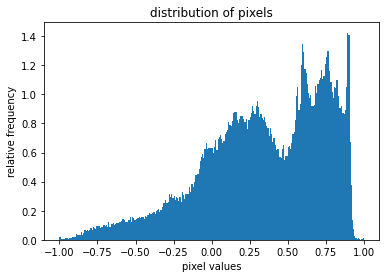

In [41]:
# plot the pixel values
plt.hist(after_norm, bins=256, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")